In [406]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [407]:
#accessing the data
df = pd.read_csv('car_data.csv')

In [408]:
#display the data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [409]:
df.shape

(301, 9)

In [410]:
#Checking Unique Values in the Categorial Features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [411]:
##Checking missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [412]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [413]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [414]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [415]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [416]:
final_dataset['Current_Year'] = 2024

In [417]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [418]:
#perfomring feature engineering
final_dataset['noof_years'] = final_dataset['Current_Year']-final_dataset['Year']

In [419]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,noof_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [420]:
#dropping unwanted columns
final_dataset.drop(['Year'],axis=1, inplace=True)

In [421]:
final_dataset.drop(['Current_Year'],axis=1, inplace=True)

In [422]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,noof_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [423]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [424]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,noof_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [425]:
#finding correlation between different features
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,noof_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
noof_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


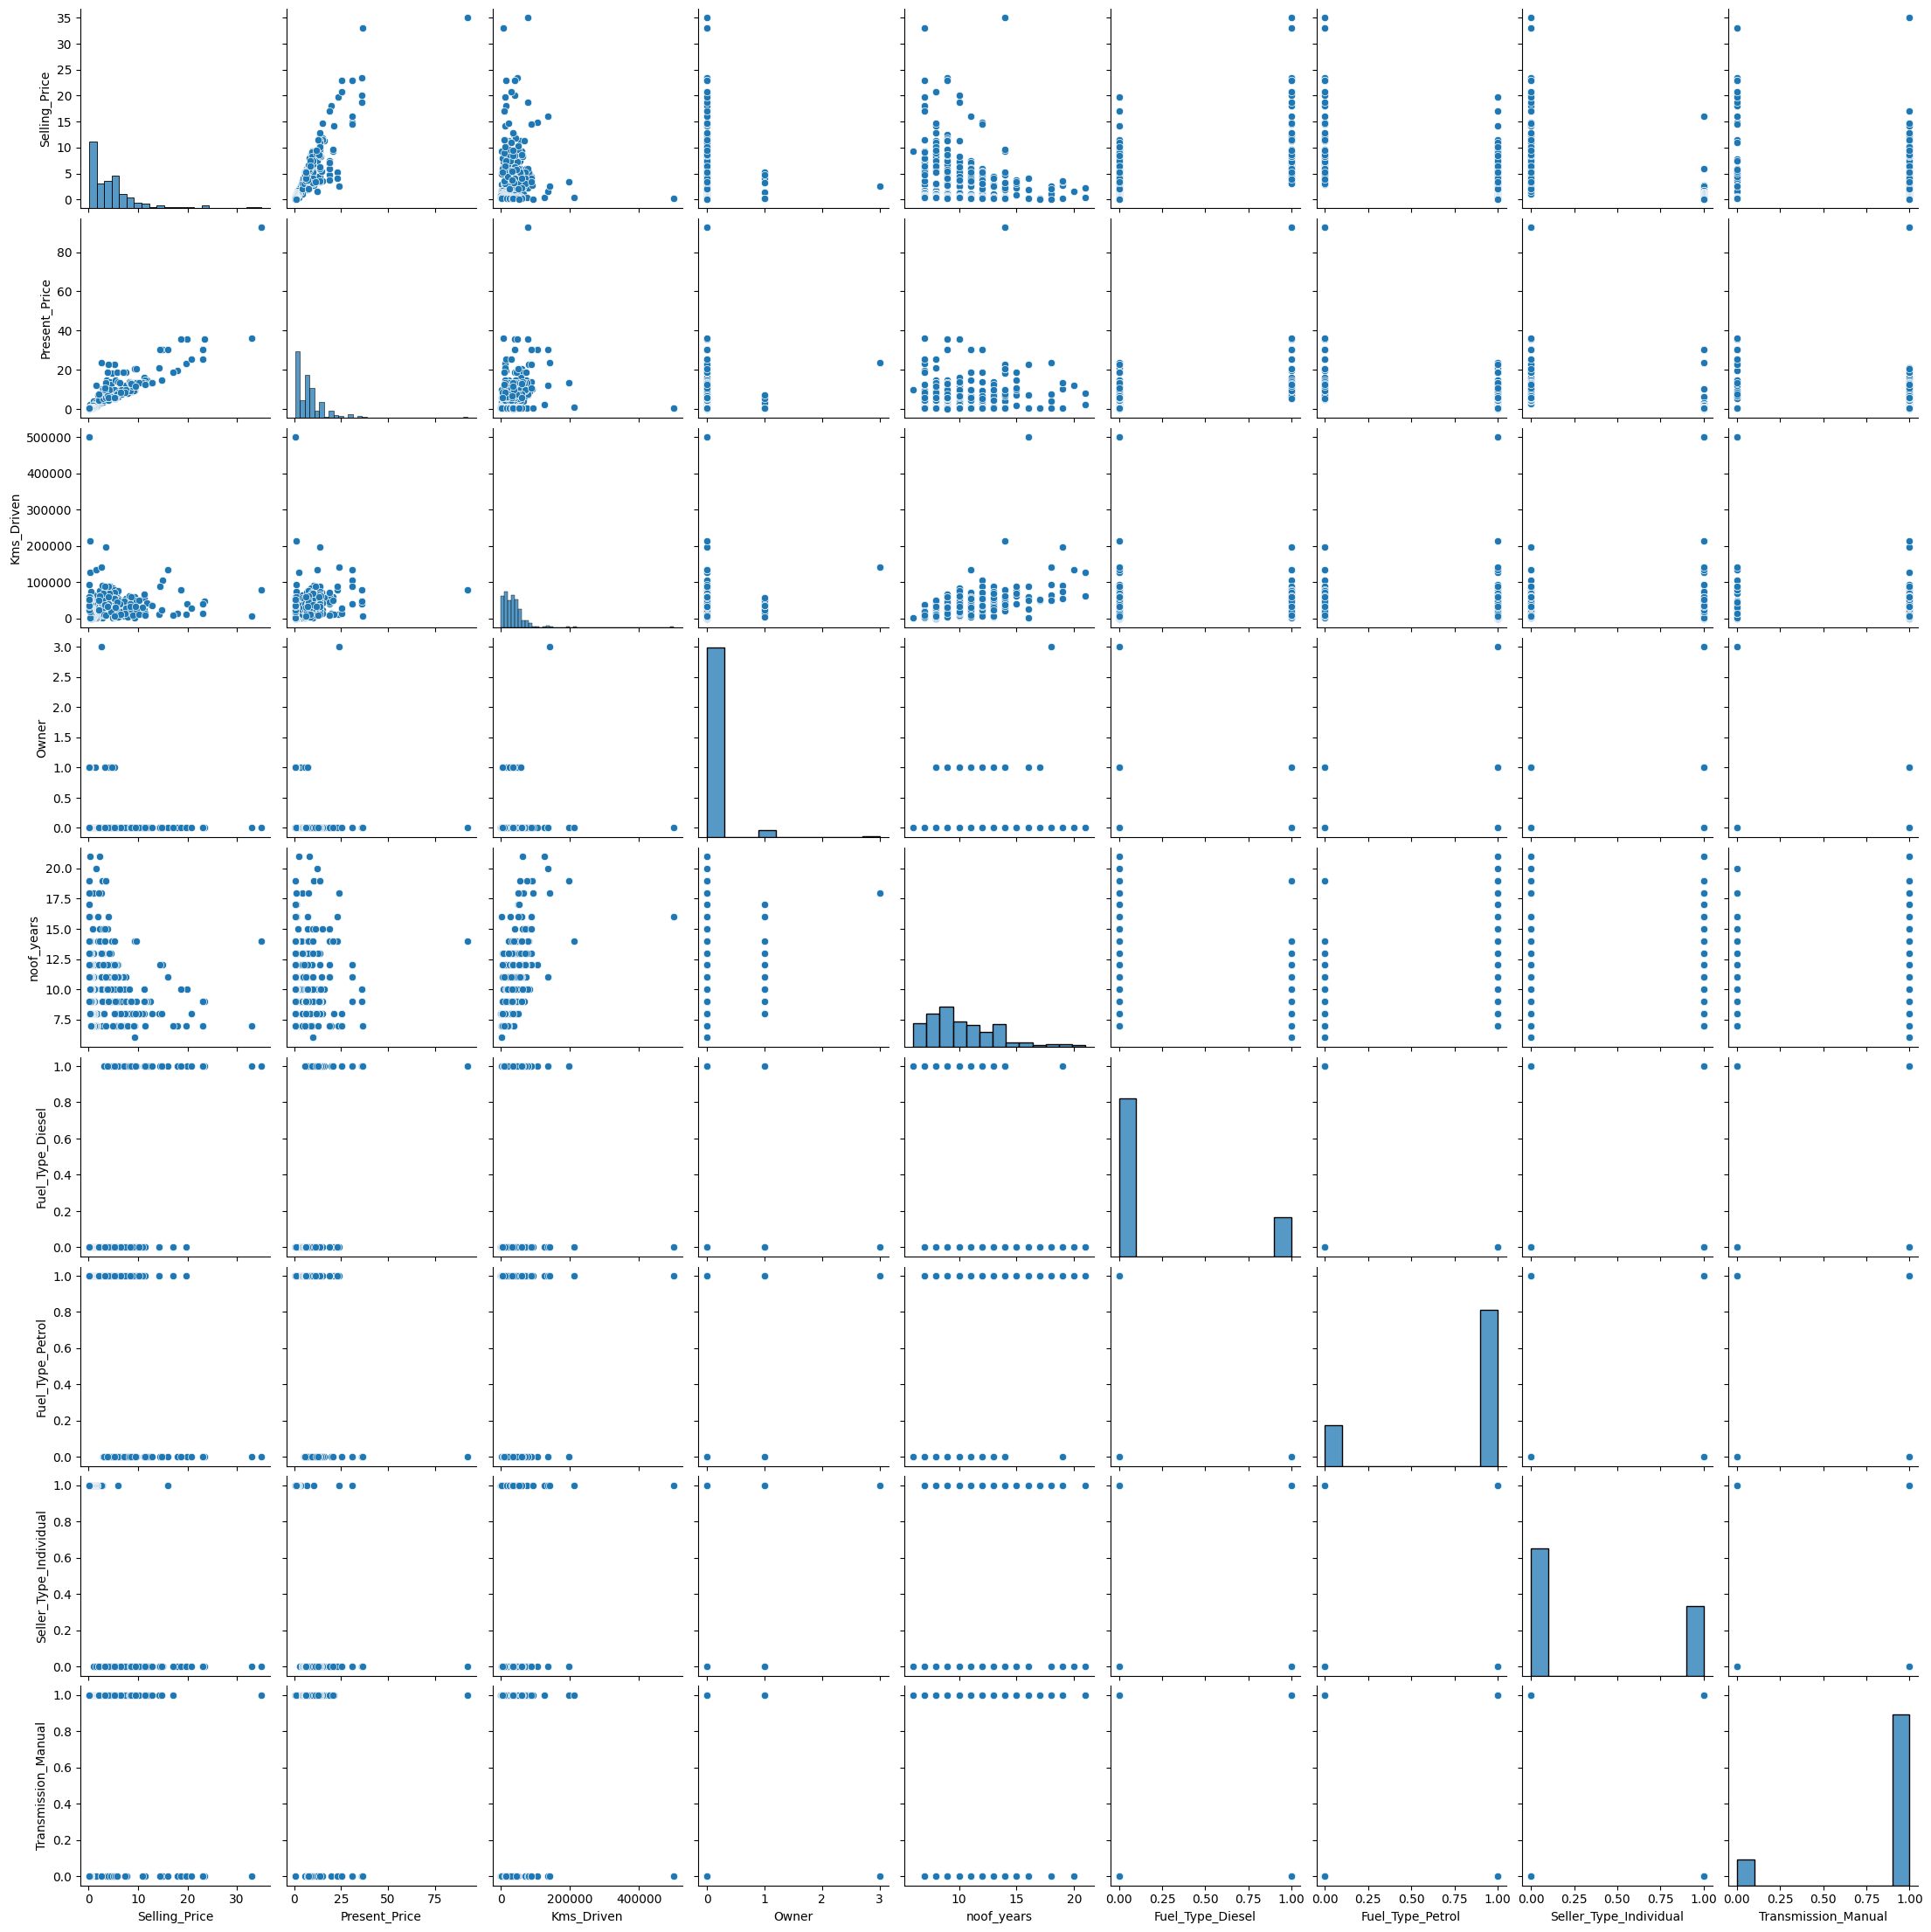

In [426]:
sns.pairplot(final_dataset)

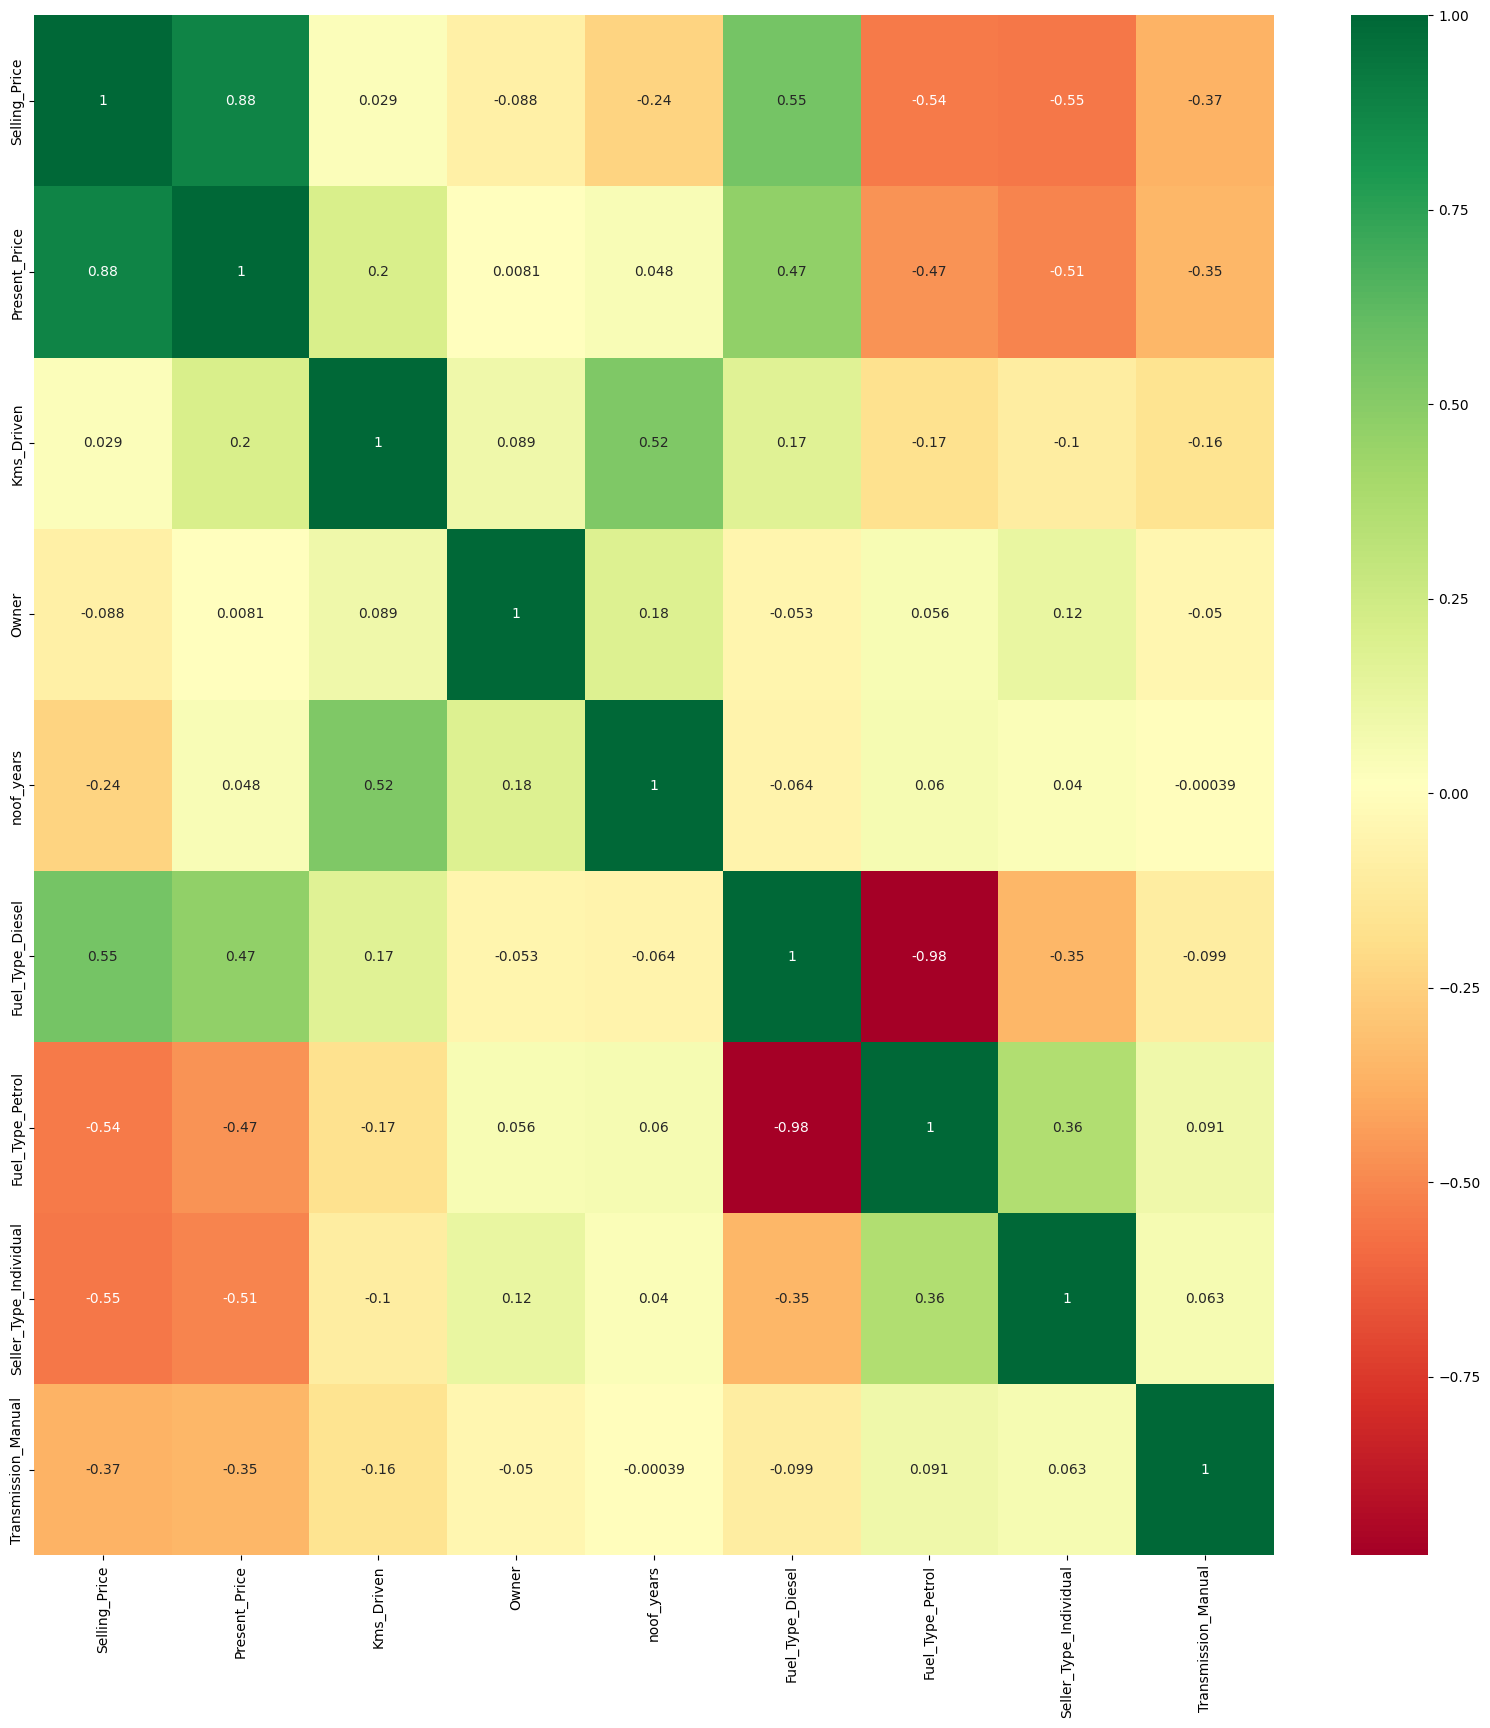

In [427]:
# Creating a heatmap
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#ploting heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [428]:
#independent and dependent features
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [429]:
x.head()

,Present_Price,Kms_Driven,Owner,noof_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [430]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [431]:
###Checking Which Model will be best Linear Regression or Random Forest Regresssion

In [432]:
#Splitting the data into training and testing
# Use 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101) #dividing into traintest split

In [433]:
#Checking the Efficinecy for Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [434]:
predictions = model.predict(X_test)

In [435]:
from sklearn import metrics

In [436]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3336356477119375
MSE: 3.7785048409787336
RMSE: 1.9438376580822623


In [437]:
from sklearn.metrics import accuracy_score
X_val=model.predict(X_test)
X_val

array([-8.46034321e-01,  7.61479761e+00,  7.96073405e+00,  8.48896659e+00,
        7.46128975e-01,  6.53439087e+00,  6.93203310e+00,  7.79333043e+00,
        7.93009477e-01,  6.85005674e+00,  5.26426671e+00,  1.92380901e-01,
       -3.92001283e+00,  3.20695849e+00,  1.10169065e+01,  4.21643060e+00,
        6.31585543e+00,  1.38611631e+00,  2.89968655e+00,  8.16364835e+00,
        4.26229319e+00,  2.97733573e+00,  5.99741171e+00,  8.94439611e+00,
       -1.09019070e-02,  5.68083637e+00,  8.38696177e-01,  4.34113722e+00,
        5.14756115e+00,  4.46175882e+00,  2.61111858e+00,  1.02728091e+01,
        5.50285757e-01,  8.18993066e+00,  4.32813881e+00, -8.47435342e-01,
        2.88099352e+00, -2.98616469e+00,  6.60004017e+00, -4.07906265e-01,
        1.94817961e+00,  4.35739411e+00,  8.90273073e+00,  1.05502655e+01,
        9.33406479e-01,  4.89740212e+00, -3.53014721e+00,  7.73277225e+00,
        6.15336705e+00,  9.41806088e+00,  6.34050981e+00,  1.43171234e+00,
        7.05144055e+00, -

In [438]:
y_val=[]
for cal in y_test:
  y_val.append(cal)
y_val

[0.35,
 7.2,
 7.5,
 7.25,
 0.2,
 5.4,
 5.95,
 7.4,
 0.55,
 9.25,
 4.8,
 1.0,
 0.2,
 3.0,
 5.25,
 4.75,
 4.6,
 0.6,
 2.65,
 9.15,
 4.4,
 2.55,
 6.0,
 7.75,
 0.5,
 5.65,
 0.4,
 3.65,
 6.1,
 4.5,
 2.25,
 11.25,
 0.5,
 11.25,
 5.3,
 0.5,
 2.9,
 0.12,
 4.95,
 2.25,
 0.8,
 5.5,
 7.05,
 2.5,
 0.48,
 4.5,
 0.1,
 9.7,
 3.95,
 8.55,
 4.75,
 1.1,
 4.9,
 0.2,
 5.8,
 4.75,
 0.4,
 0.35,
 4.75,
 8.4,
 0.2]

In [439]:
from sklearn.metrics import r2_score #accuracy caluculator
score = r2_score(y_val, X_val)
print("The accuracy of our Linear Regression model is {}%".format(round(score, 2) *100))

The accuracy of our Linear Regression model is 61.0%


In [440]:
#Checking the Efficinecy for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
from sklearn.metrics import mean_squared_error, r2_score
model.fit(X_train,y_train)

RandomForestRegressor()

In [441]:
predictions = model.predict(X_test)
import matplotlib.pyplot as plt

In [442]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6652655737704914
MSE: 2.4517729485245905
RMSE: 1.5658138294588506


In [443]:
from sklearn.metrics import accuracy_score
X_val=model.predict(X_test)
X_val

array([ 0.4515,  6.0995,  7.0618,  7.4055,  0.2591,  5.1385,  5.7341,
        6.7429,  0.5621,  8.5199,  5.216 ,  1.1142,  0.2023,  3.1735,
       10.4569,  3.9595,  3.9015,  0.5716,  3.3075,  9.8971,  5.132 ,
        2.866 ,  7.0309,  7.9698,  0.5224,  5.9665,  0.4209,  4.0095,
        5.7035,  4.8255,  2.9955,  7.9218,  0.5927,  9.9518,  4.5195,
        0.4928,  3.243 ,  0.2054,  5.0104,  2.2775,  0.77  ,  5.164 ,
        6.9915, 12.058 ,  0.5917,  4.4995,  0.268 ,  8.9337,  4.0155,
       10.9755,  3.878 ,  1.1864,  6.314 ,  0.4582,  5.7035,  4.4725,
        0.4294,  0.3556,  5.224 ,  8.801 ,  0.2716])

In [444]:
y_val=[]
for cal in y_test:
  y_val.append(cal)
y_val

[0.35,
 7.2,
 7.5,
 7.25,
 0.2,
 5.4,
 5.95,
 7.4,
 0.55,
 9.25,
 4.8,
 1.0,
 0.2,
 3.0,
 5.25,
 4.75,
 4.6,
 0.6,
 2.65,
 9.15,
 4.4,
 2.55,
 6.0,
 7.75,
 0.5,
 5.65,
 0.4,
 3.65,
 6.1,
 4.5,
 2.25,
 11.25,
 0.5,
 11.25,
 5.3,
 0.5,
 2.9,
 0.12,
 4.95,
 2.25,
 0.8,
 5.5,
 7.05,
 2.5,
 0.48,
 4.5,
 0.1,
 9.7,
 3.95,
 8.55,
 4.75,
 1.1,
 4.9,
 0.2,
 5.8,
 4.75,
 0.4,
 0.35,
 4.75,
 8.4,
 0.2]

In [445]:
from sklearn.metrics import r2_score #accuracy caluculator
score = r2_score(y_val, X_val)
print("The accuracy of our Random Forest Regression model is {}%".format(round(score, 2) *100))

The accuracy of our Random Forest Regression model is 74.0%


In [446]:
##Finding Feature Importance. This is understand which feature are important to consider for the model
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [447]:
print(model.feature_importances_)

[0.37210665 0.03828845 0.00043628 0.07742375 0.23607479 0.00800148
 0.13760106 0.13006754]


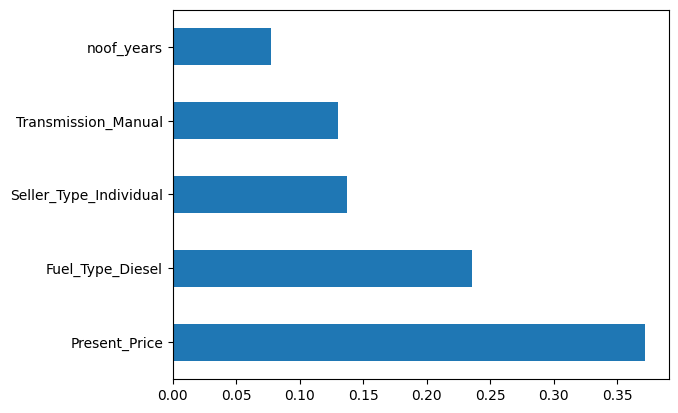

In [448]:
#plot graph of feature importance for better visualization
feature_importances = pd.Series(model.feature_importances_,index=x.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [449]:
x_train.shape

(240, 8)

In [450]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [451]:
### Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [452]:
from sklearn.model_selection import RandomizedSearchCV

In [453]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [454]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [455]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [456]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [457]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [458]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 25}

In [459]:
rf_random.best_score_

-3.9438246356260267

In [460]:
final_predictions=rf_random.predict(X_test)

In [461]:
final_predictions

array([ 0.45953,  5.9793 ,  7.4644 ,  7.71388,  0.33694,  5.29129,
        5.56485,  7.31658,  0.51776,  8.25403,  5.25005,  0.99193,
        0.46161,  3.55425,  7.43903,  4.04161,  4.9557 ,  0.57065,
        3.56759,  9.35517,  5.02215,  2.72374,  6.80257,  8.07384,
        0.53736,  6.04856,  0.47706,  4.05245,  5.7295 ,  4.68974,
        2.95628,  8.85814,  0.60914,  9.26028,  4.61905,  0.52818,
        3.42715,  0.31777,  5.93913,  2.80851,  0.81697,  5.21341,
        6.82307,  8.06231,  0.60919,  4.46795,  0.4993 ,  8.39365,
        5.15997, 10.15523,  4.7998 ,  1.17713,  8.12174,  0.42655,
        5.74305,  4.39735,  0.54381,  0.47347,  7.01384,  8.55412,
        0.36155])

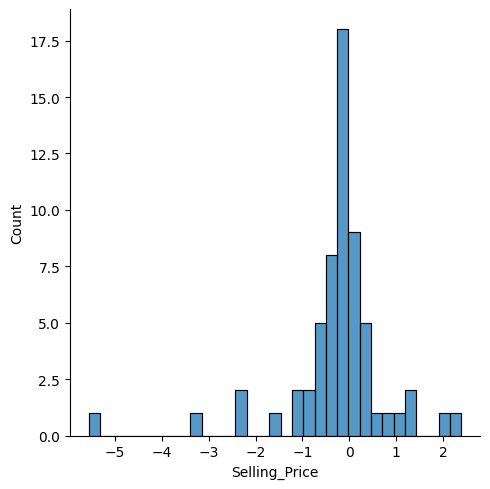

In [462]:
sns.displot(y_test-final_predictions)

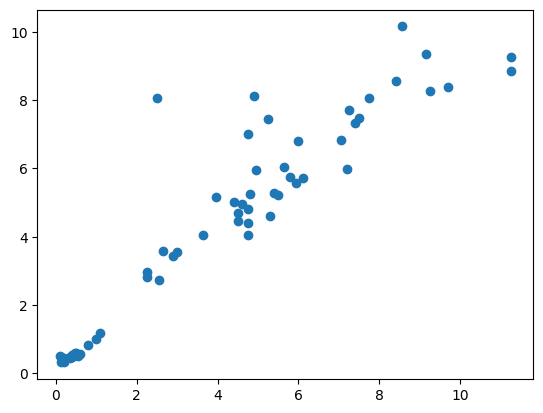

In [463]:
plt.scatter(y_test,final_predictions)

In [465]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)